<a href="https://colab.research.google.com/github/Palemravichandra/Electricity-Prediction/blob/main/Electrical_sub_station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
# Importing the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Reading the data

In [2]:
# Reading the data
df = pd.read_csv("Electric Station Data.csv")

In [3]:
df.head()

,Temp,Vacuum,Pressure,Plant,Humidity,Energy,TempDiff,PressureDiff,RHSquared,Testing Type,Place,PowerPerFuel,TempVacuum
0,29.95,NaN,1011.44#$&!$,Amrita Energy Systems,66.32,432.81,-43.47,938.0200000000001,NaN,Development Phase,Coimbatore,0.196828,2198.929
1,5.76r,40.07,1013.22,Amrita Energy Systems,62.99,494.67,-34.31,973.15II@,3967.7401000000004,Development Phase,Coimbatore,2.143255,230.8032
2,29.44,NaN,1011.4,Amrita Energy Systems,61.78,442.32,-34.89,947.0699999999999,NaN,Development Phase,Coimbatore,0.233553,1893.8752
3,32.83#,74.33,1011.44,Amrita Energy Systems,50.42,427.36,-41.5,937.11,2542.1764000000003,Development Phase,Coimbatore,0.175129,2440.2538999999997
4,16.86,39.63,1004.47,Amrita Energy Systems,83.5,466.68,-22.770000000000003,NaN,6972.25,Development Phase,Coimbatore,0.698454,668.1618


In [4]:
df.shape

(19230, 13)

In [5]:
df.columns

Index(['Temp', 'Vacuum', 'Pressure', 'Plant', 'Humidity', 'Energy', 'TempDiff',
       'PressureDiff', 'RHSquared', 'Testing Type', 'Place', 'PowerPerFuel',
       'TempVacuum'],
      dtype='object')

Basic Information about the data - Exploratory data analysis

In [6]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19230 entries, 0 to 19229
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temp          16347 non-null  object 
 1   Vacuum        16347 non-null  object 
 2   Pressure      19230 non-null  object 
 3   Plant         16347 non-null  object 
 4   Humidity      19230 non-null  object 
 5   Energy        19230 non-null  float64
 6   TempDiff      19230 non-null  object 
 7   PressureDiff  16347 non-null  object 
 8   RHSquared     16347 non-null  object 
 9   Testing Type  19230 non-null  object 
 10  Place         19230 non-null  object 
 11  PowerPerFuel  16347 non-null  float64
 12  TempVacuum    16347 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.9+ MB


In [7]:
# Describe the data - Descriptive Statistics
df.describe()

,Energy,PowerPerFuel
count,19230.000000,16347.000000
mean,454.363276,0.618519
std,17.059242,0.507499
min,420.260000,0.158781
25%,439.830000,0.261322
50%,451.440000,0.403173
75%,468.270000,0.822638
max,495.760000,6.875244


Using this function, you can see the number of null values, datatypes and memory usage as shown in the above outputs along with the descriptive statistics

2.Dupllicate values

You can use df.duplicate.sum() function to the sum of duplicate values present if any. It will show the number of duplicate values if they present in the dataset.

In [8]:
# Finding the duplicates
df.duplicated().sum()

12820

3. Unique values in the data

You can find the number of unique values in the particular column using unique() function in python.

In [9]:
# Unique values
df['Plant'].unique()

array(['Amrita Energy Systems', nan], dtype=object)

In [10]:
df['Testing Type'].unique()

array(['Development Phase'], dtype=object)

In [11]:
# Count unique values in each column
df.nunique()

Temp            2867
Vacuum          1140
Pressure        2758
Plant              1
Humidity        4186
Energy          3910
TempDiff        4339
PressureDiff    4261
RHSquared       3767
Testing Type       1
Place              1
PowerPerFuel    5436
TempVacuum      5388
dtype: int64

The unique() function has returned the unique values which are present in the dataset.

4. Find the Null values

Find the null values is the most important step in the EDA process. So, lets see how we can find the null values in the data

In [12]:
# Find the null values
df.isnull().sum()

Temp            2883
Vacuum          2883
Pressure           0
Plant           2883
Humidity           0
Energy             0
TempDiff           0
PressureDiff    2883
RHSquared       2883
Testing Type       0
Place              0
PowerPerFuel    2883
TempVacuum      2883
dtype: int64

We have some null values in the 'Temp', 'Vacuum', 'Plant', 'PressureDiff', 'RHSquared', 'PowerPerFuel' and 'TempVacuum'.

5. Visualization of the unique counts

<Axes: xlabel='Humidity', ylabel='count'>

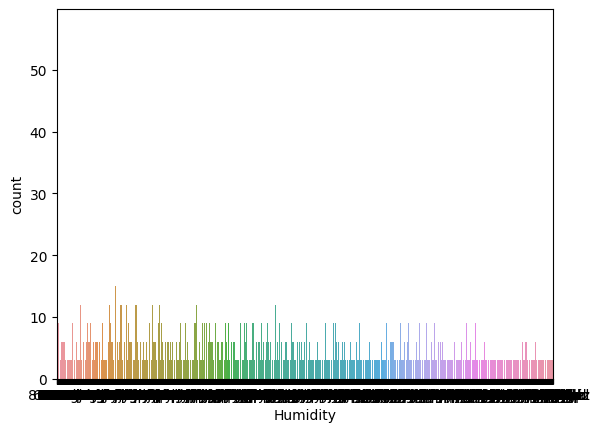

In [13]:
# plot the unique values
sns.countplot(x='Humidity', data=df)

6. Replacing Alphanumeric values with Numeric values

In [14]:
# as there are some alphanumeric values, we need to convert them
import re

df['Temp'] = df['Temp'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))
df['Vacuum'] = df['Vacuum'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))
df['Pressure'] = df['Pressure'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))
df['Humidity'] = df['Humidity'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))
df['PressureDiff'] = df['PressureDiff'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))
df['TempDiff'] = df['TempDiff'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))


In [15]:
# remove columns using drop
df_new = df.drop(['Testing Type', 'Place', 'Plant', 'RHSquared', 'TempVacuum'], axis = 1)

In [16]:
# shape of the data
df_new.shape

(19230, 8)

In [17]:
# convert to numeric
df_new['Temp'] = pd.to_numeric(df_new['Temp'], errors='coerce')
df_new['Vacuum'] = pd.to_numeric(df_new['Vacuum'], errors='coerce')
df_new['Pressure'] = pd.to_numeric(df_new['Pressure'], errors='coerce')
df_new['Humidity'] = pd.to_numeric(df_new['Humidity'], errors='coerce')
df_new['PressureDiff'] = pd.to_numeric(df_new['PressureDiff'], errors='coerce')
df_new['TempDiff'] = pd.to_numeric(df_new['TempDiff'], errors='coerce')

In [18]:
df_new.head()

,Temp,Vacuum,Pressure,Humidity,Energy,TempDiff,PressureDiff,PowerPerFuel
0,29.95,NaN,1011.44,66.32,432.81,43.47,938.02,0.196828
1,5.76,40.07,1013.22,62.99,494.67,34.31,973.15,2.143255
2,29.44,NaN,1011.40,61.78,442.32,34.89,947.07,0.233553
3,32.83,74.33,1011.44,50.42,427.36,41.50,937.11,0.175129
4,16.86,39.63,1004.47,83.50,466.68,22.77,NaN,0.698454


In [19]:
df_new.shape

(19230, 8)

In [21]:
df_new.info

<bound method DataFrame.info of         Temp  Vacuum  Pressure  Humidity  Energy  TempDiff  PressureDiff  \
0      29.95     NaN   1011.44     66.32  432.81     43.47        938.02   
1       5.76   40.07   1013.22     62.99  494.67     34.31        973.15   
2      29.44     NaN   1011.40     61.78  442.32     34.89        947.07   
3      32.83   74.33   1011.44     50.42  427.36     41.50        937.11   
4      16.86   39.63   1004.47     83.50  466.68     22.77           NaN   
...      ...     ...       ...       ...     ...       ...           ...   
19225  23.39   61.87   1010.35     48.91  444.03     38.48        948.48   
19226  11.63     NaN   1022.89     87.12  474.67     28.92        982.34   
19227    NaN   69.23   1012.86     45.71  435.06     41.44        943.63   
19228  12.26   41.50   1014.87     89.41  471.13     29.24        973.37   
19229  11.75   40.55   1018.09     97.70  472.43     28.80        977.54   

       PowerPerFuel  
0          0.196828  
1          

7. Dropping the NULL Values

In [22]:
# dropping nan values
df_new = df_new.dropna()

In [23]:
df_new.shape

(10065, 8)

8. Know the dataframes

Knowing the datatypes which you are exploring it.

In [24]:
df_new.dtypes

Temp            float64
Vacuum          float64
Pressure        float64
Humidity        float64
Energy          float64
TempDiff        float64
PressureDiff    float64
PowerPerFuel    float64
dtype: object

9. Correlation Plot - EDA

it gives some fair idea of the correlation strength between different variables

In [25]:
df_new.corr()

,Temp,Vacuum,Pressure,Humidity,Energy,TempDiff,PressureDiff,PowerPerFuel
Temp,1.000000,0.842567,-0.501144,-0.553647,-0.949224,0.423948,-0.847264,-0.865857
Vacuum,0.842567,1.000000,-0.422994,-0.310159,-0.867962,0.845000,-0.941888,-0.728385
Pressure,-0.501144,-0.422994,1.000000,0.104681,0.511956,-0.213714,0.702806,0.388221
Humidity,-0.553647,-0.310159,0.104681,1.000000,0.399333,0.028157,0.282306,0.393599
Energy,-0.949224,-0.867962,0.511956,0.399333,1.000000,-0.517068,0.871209,0.862054
TempDiff,0.423948,0.845000,-0.213714,0.028157,-0.517068,1.000000,-0.742617,-0.365132
PressureDiff,-0.847264,-0.941888,0.702806,0.282306,0.871209,-0.742617,1.000000,0.715759
PowerPerFuel,-0.865857,-0.728385,0.388221,0.393599,0.862054,-0.365132,0.715759,1.000000


this is the correlation matrix with the range from -1 to +1, where +1 is highly and positively correlated and -1 will be highly negatively correlated.

you can even visualize the correlation matrix using seaborn library

<Axes: >

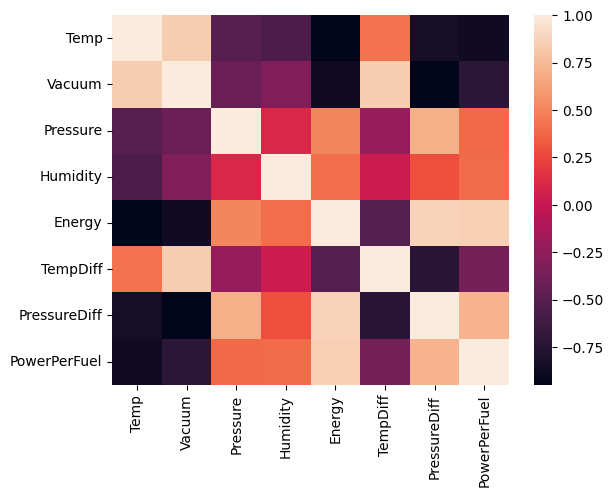

In [26]:
sns.heatmap(df_new.corr())

Machine Learning Predictions

In [32]:
# train test split
from sklearn.model_selection import train_test_split

X = df_new.drop('Energy', axis = 1)
y = df_new['Energy']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

x_train.columns

Index(['Temp', 'Vacuum', 'Pressure', 'Humidity', 'TempDiff', 'PressureDiff',
       'PowerPerFuel'],
      dtype='object')

In [34]:
x_train.shape,y_train.shape

((8555, 7), (8555,))

In [35]:
x_train

,Temp,Vacuum,Pressure,Humidity,TempDiff,PressureDiff,PowerPerFuel
4014,7.57,37.49,1009.73,83.07,29.92,972.24,1.698313
17275,30.09,76.20,1006.64,61.02,46.11,930.44,0.189580
12455,21.98,55.50,1017.89,57.90,33.52,962.39,0.374862
17299,23.73,59.15,1014.08,62.65,35.42,954.93,0.316373
8332,16.38,55.50,1019.80,82.44,39.12,964.30,0.511039
...,...,...,...,...,...,...,...
10916,12.95,40.10,1015.31,86.01,27.15,975.21,0.907134
9885,20.95,44.89,1010.48,67.97,23.94,965.59,0.478911
10258,26.53,60.07,1016.55,54.79,33.54,956.48,0.275178
1602,24.88,63.31,1014.23,55.76,38.43,950.92,0.280316


### Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization

In [36]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_scale=std.fit_transform(x_train)
x_test_scale=std.transform(x_test)

In [39]:
x_train.iloc[0]

Temp               7.570000
Vacuum            37.490000
Pressure        1009.730000
Humidity          83.070000
TempDiff          29.920000
PressureDiff     972.240000
PowerPerFuel       1.698313
Name: 4014, dtype: float64

In [44]:
x_train_scale[0],x_test_scale[0],y_train,y_test

(array([-1.60762084, -1.32902958, -0.58373942,  0.65248803, -0.64427217,
         0.82900208,  2.08457825]),
 array([ 0.30478749,  0.46520067,  0.47619404,  1.15852457,  0.48095068,
        -0.1896364 , -0.55585996]),
 4014     481.98
 17275    434.68
 12455    457.29
 17299    444.07
 8332     464.58
           ...  
 10916    471.07
 9885     450.39
 10258    438.54
 1602     441.54
 13873    444.50
 Name: Energy, Length: 8555, dtype: float64,
 6691     446.31
 2756     459.00
 17150    431.65
 5113     435.79
 64       448.76
           ...  
 13072    438.73
 18507    480.56
 12208    458.28
 7655     470.81
 13720    443.50
 Name: Energy, Length: 1510, dtype: float64)

### Linear Regression

In [49]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False], 'positive': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv = 5, verbose = 2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.1s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.1s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.1s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.1s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.1s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.1s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.1s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.1s
[CV] END ....copy_X=True, fit_intercept=False, po

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             verbose=2)

In [50]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [51]:
y_pred = grid.predict(x_test)

In [52]:
# evaluation metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean squared error:  21.311868681067615
Mean absolute error:  3.531976621544035
R2 Score:  0.92648339749949


### Decision Tree Classifier

In [66]:
# Implementing decision tree

from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_depth': [5, 10, 20, 50]}

grid_dtc= GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose = 2)

grid_dtc.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=20; total time=   0.1s
[CV] END .......................................m

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 20, 50]}, verbose=2)

In [67]:
grid_dtc.best_params_

{'max_depth': 20}

In [68]:
# predicting the model
y_pred = grid_dtc.predict(x_test)

In [69]:
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean squared error:  0.3308079374586093
Mean absolute error:  0.08269486754966923
R2 Score:  0.9988588576625492


### Random Forest Regressior

In [57]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
param_grid = {'n_estimators': [10, 50, 100, 500], 'max_depth': [ 5, 10, 20, 50]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, verbose = 2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.8s
[CV] END .......................max_depth=5, n_estimators=50; total time=   1.2s
[CV] END .......................max_depth=5, n_estimators=50; total time=   1.2s
[CV] END .......................max_depth=5, n_estimators=50; total time=   1.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=100; total time=   1.9s
[CV] END ......................max_depth=5, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20, 50],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [58]:
grid.best_params_

{'max_depth': 50, 'n_estimators': 500}

In [59]:
# predicting the value
y_pred = grid.predict(x_test)

In [60]:
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean squared error:  1.1236581699638657
Mean absolute error:  0.5564186754967102
R2 Score:  0.9961238719952761


KNN Regressior

In [61]:
# implementing KNN regressor

from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': [5, 10, 20, 50]}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5, verbose = 2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=20; total time=   0.0s
[CV] END .....................................n_n

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 20, 50]}, verbose=2)

In [62]:
grid.best_params_

{'n_neighbors': 5}

In [64]:
# predicting the values
y_pred = grid.predict(x_test)

In [65]:
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean squared error:  11.495183141721862
Mean absolute error:  2.2112715231788083
R2 Score:  0.9603466583645356


MODEL SAVING

In [70]:
import pickle
# open a file, where you ant to store the data
file = open('power.pkl', 'wb')

# dump information to that file
pickle.dump(grid_dtc, file)

In [71]:
model = open('power.pkl','rb')
forest = pickle.load(model)

In [74]:
x_test.iloc[0]

Temp              21.860000
Vacuum            60.270000
Pressure        1016.060000
Humidity          90.480000
TempDiff          38.410000
PressureDiff     955.790000
PowerPerFuel       0.338755
Name: 6691, dtype: float64

In [76]:
y=np.array([[5.76,40.07,1013.22,62.99,34.31,973.15,2.1432]])
new=forest.predict(y)
print(new[0])

494.67


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
